<a href="https://colab.research.google.com/github/mbrimmer/Sample_Projects/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction - Poisonous Mushrooms

This dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. 

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import LogNorm

Download Data

In [2]:
!wget https://raw.githubusercontent.com/noahgift/machine_learning_fundamentals/master/mushroom.map
!wget https://raw.githubusercontent.com/noahgift/machine_learning_fundamentals/master/mushroom.data
!ls -l /content

--2019-08-18 19:38:34--  https://raw.githubusercontent.com/noahgift/machine_learning_fundamentals/master/mushroom.map
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘mushroom.map’

mushroom.map        100%[===================>]   3.13K  --.-KB/s    in 0s      

2019-08-18 19:38:35 (81.3 MB/s) - ‘mushroom.map’ saved [3203/3203]

--2019-08-18 19:38:35--  https://raw.githubusercontent.com/noahgift/machine_learning_fundamentals/master/mushroom.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922016 (900K

Load feature names.

In [3]:
feature_names = []
with open('/content/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

with open('/content/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [5]:
def P1():
  ### STUDENT START ###
  
  for k in range(1,50):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(train_data)  
    print('Variance Explaained with {} Components: {}'\
          .format(k, pca.explained_variance_ratio_.sum().round(3)))
  
  
  ### STUDENT END ###

P1()

Variance Explaained with 1 Components: 0.164
Variance Explaained with 2 Components: 0.297
Variance Explaained with 3 Components: 0.399
Variance Explaained with 4 Components: 0.47
Variance Explaained with 5 Components: 0.508
Variance Explaained with 6 Components: 0.545
Variance Explaained with 7 Components: 0.576
Variance Explaained with 8 Components: 0.604
Variance Explaained with 9 Components: 0.63
Variance Explaained with 10 Components: 0.652
Variance Explaained with 11 Components: 0.673
Variance Explaained with 12 Components: 0.691
Variance Explaained with 13 Components: 0.708
Variance Explaained with 14 Components: 0.726
Variance Explaained with 15 Components: 0.741
Variance Explaained with 16 Components: 0.756
Variance Explaained with 17 Components: 0.77
Variance Explaained with 18 Components: 0.784
Variance Explaained with 19 Components: 0.797
Variance Explaained with 20 Components: 0.809
Variance Explaained with 21 Components: 0.82
Variance Explaained with 22 Components: 0.83
Va

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

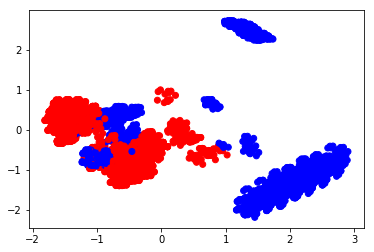

In [6]:
def P2():
  ### STUDENT START ###
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(train_data)  
#   print(principalComponents.shape)
#   print("PC shaape: ",principalComponents.shape)
#   print("train label shape: ",train_labels.shape)
  fig, ax = plt.subplots()
  colordict = {1:'blue', 0:'red'}
  labeldict = {1:'poisonous', 0:'non-poisonous'}
  colors = [colordict[x] for x in train_labels.tolist()]
  labels = [labeldict[x] for x in train_labels.tolist()]

  ax.scatter(x=principalComponents[:,0],
             y=principalComponents[:,1],
             c = colors)
P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

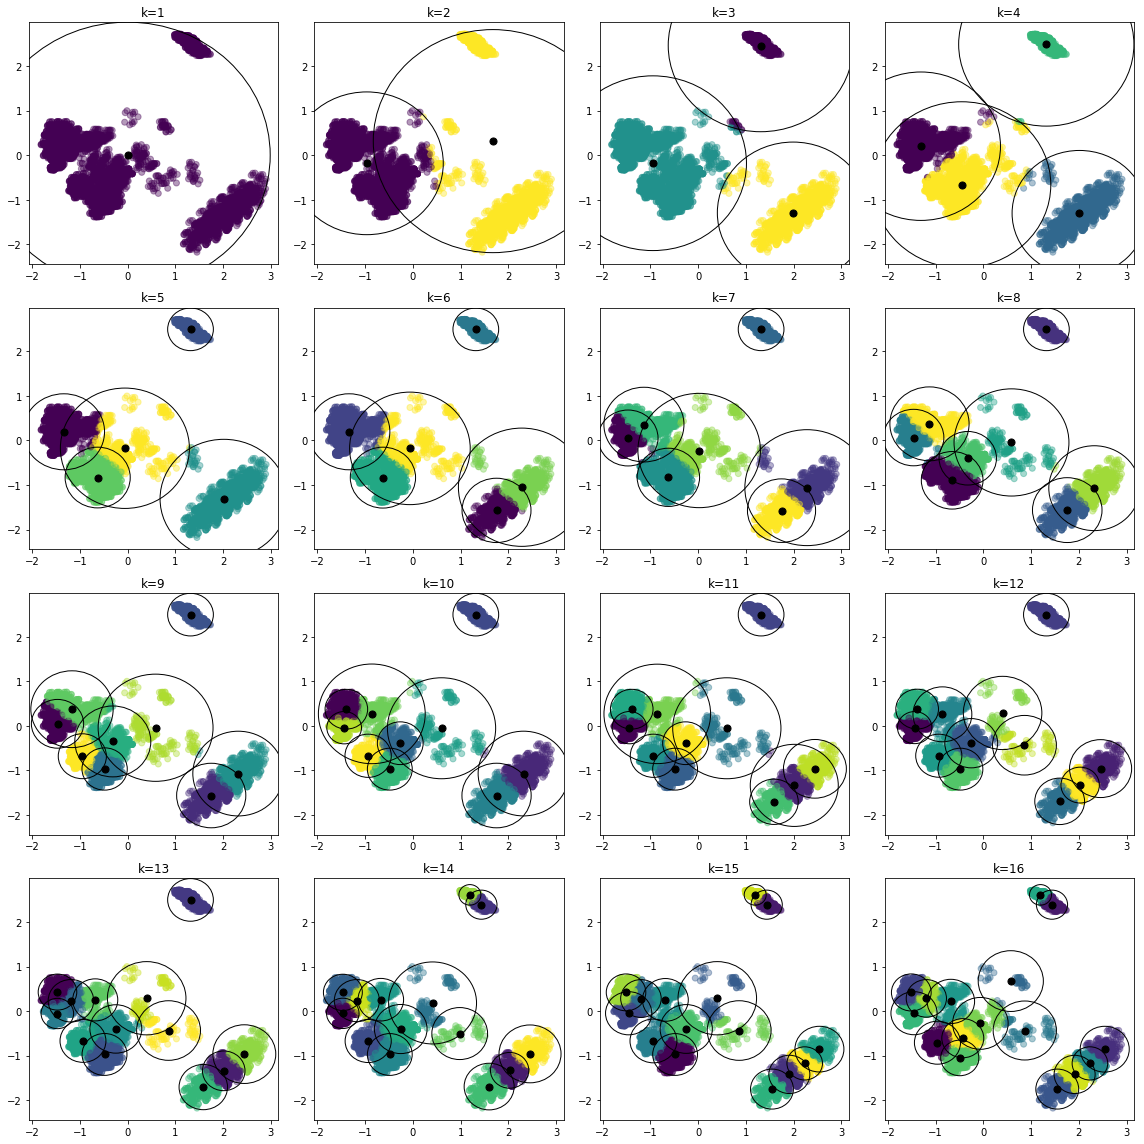

In [7]:
def P3():
  ### STUDENT START ###
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(train_data)
  
  colordict = {1:'blue', 0:'red'}
  labeldict = {1:'poisonous', 0:'non-poisonous'}
  colors = [colordict[x] for x in train_labels.tolist()]
  labels = [labeldict[x] for x in train_labels.tolist()]
  
  fig, ax = plt.subplots()
  fig.set_size_inches(16, 16)

  k_max = 16



  for k in range(1,k_max+1):
    ax = plt.subplot(4, 4, k)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(principalComponents)

    # now need to find distance from each center to furthest point and plot circle
    trans_dist=kmeans.transform(principalComponents) 
    
    # there is probably some better way to do this but this looks correct
    dist_to_label_center = \
      np.ndarray.take(trans_dist, kmeans.labels_, axis=1).diagonal()

    # Plot using K as color
    ax.scatter(x=principalComponents[:,0],
               y=principalComponents[:,1],
               c = kmeans.labels_,
               alpha=.4
              )

    # mark each point on the graph
    ax.scatter(x = kmeans.cluster_centers_[:, 0], 
               y = kmeans.cluster_centers_[:, 1], 
               c='black', s=50, alpha=1)
    # find max distance for k label
    max_dist_dict = dict()

    for i in range(0,k):
      max_dist = dist_to_label_center[kmeans.labels_ == i].max()
      max_dist_dict[i] = max_dist
      circle1 = plt.Circle(tuple(kmeans.cluster_centers_[i]), 
                           radius=max_dist_dict[i], 
                           color='black', 
                           fill=False)
      ax.add_artist(circle1)
      ax.set_title("k={}".format(k))

  plt.tight_layout()
  plt.show()

  ### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/usr/local/lib/python3.6/dist-packages/matplotlib/conto

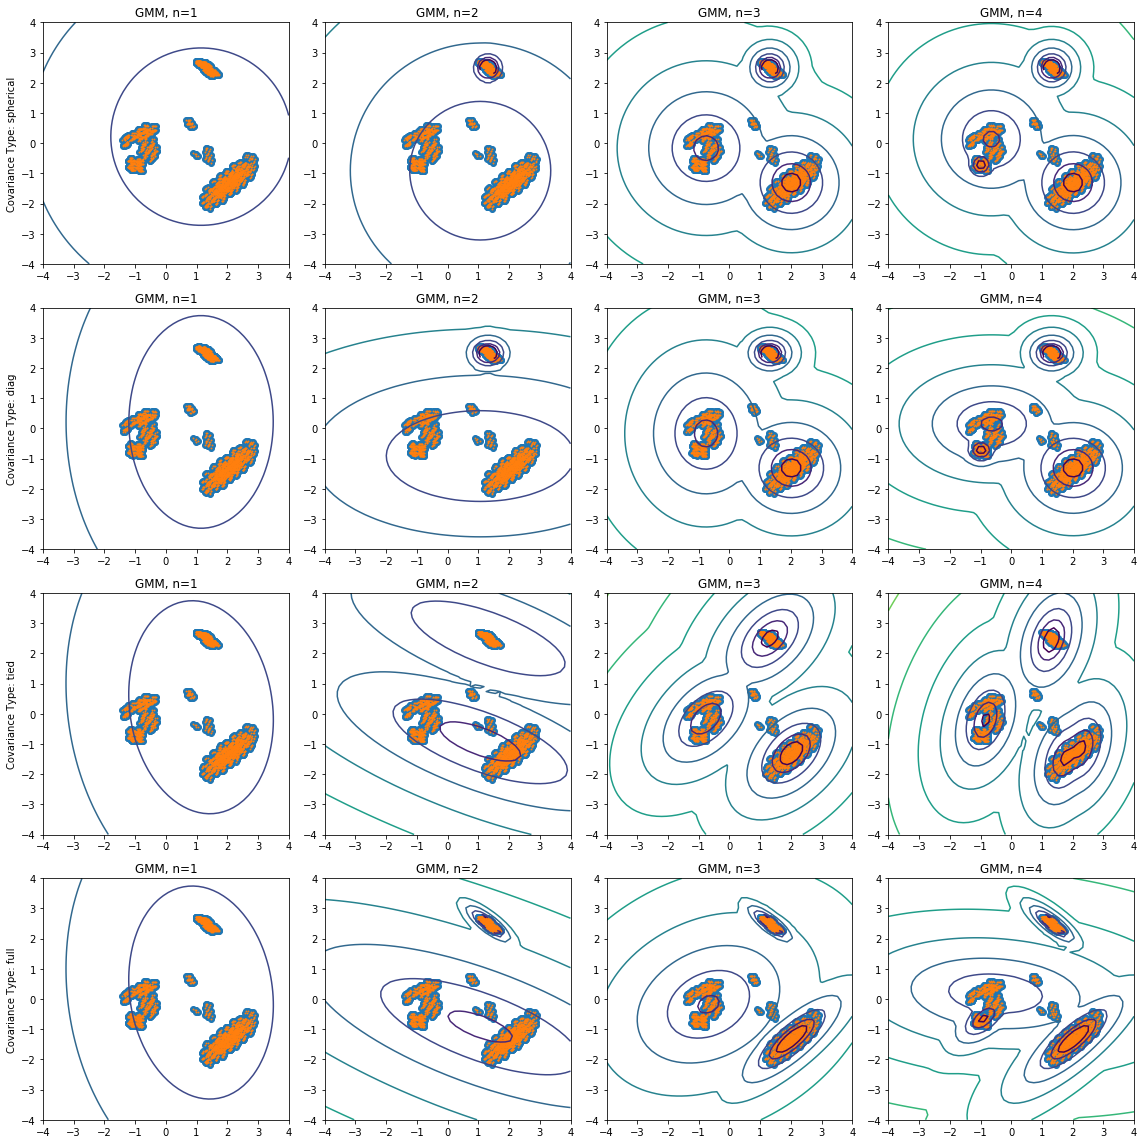

In [8]:
def P4():
  ### STUDENT START ###
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(train_data)

  fig, ax = plt.subplots()

  # Just keep positive results
  principalComponents_pos = principalComponents[train_labels==1]

  fig.set_size_inches(16, 16)

  n_max = 4
  cov_options = ['spherical', 'diag', 'tied', 'full']
  
  index = 1
  for option in cov_options:
    for n in range(1,n_max+1):
      ax = plt.subplot(n_max, 4, index)

      ax.scatter(x=principalComponents_pos[:,0],
                 y=principalComponents_pos[:,1])

      # fit a Gaussian Mixture Model with two components
      clf = GMM(n_components=n, covariance_type=option)
      clf.fit(principalComponents_pos)

      # display predicted scores by the model as a contour plot
      max_range = 4
      x = np.linspace(-max_range, max_range)
      y = np.linspace(-max_range, max_range)
      X, Y = np.meshgrid(x, y)
      XX = np.array([X.ravel(), Y.ravel()]).T
      Z = -clf.score_samples(XX)
      Z = Z.reshape(X.shape)

      CS = plt.contour(X, Y, Z, 
                       norm=LogNorm(vmin=1.0, vmax=1000.0),
                       levels=np.logspace(0, 3, 10))

      plt.scatter(x = principalComponents_pos[:, 0], 
                  y = principalComponents_pos[:, 1], 
                  s=.8)

      if (index - 1)% 4 == 0:
        ax.set_ylabel('Covariance Type: {}'.format(option))
      plt.title('GMM, n={}'.format(n))
      index+=1
  
  plt.tight_layout()
  plt.show()
  ### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
def P5():
  ### STUDENT START ###
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(train_data)

  # keep positive and negative separately
  principalComponents_pos = principalComponents[train_labels==1]
  principalComponents_neg = principalComponents[train_labels==0]
  
  clf_pos = GMM(n_components=4, covariance_type='full')
  clf_pos.fit(principalComponents_pos)
  
  clf_neg = GMM(n_components=4, covariance_type='full')
  clf_neg.fit(principalComponents_neg)
  
  # now fit the test data
  pc_test = pca.transform(test_data)
  
  positive_probs = clf_pos.score_samples(pc_test)
  negative_probs = clf_neg.score_samples(pc_test)
  
  y_pred = np.ones(len(positive_probs), dtype=int)

  for j in range(0,len(positive_probs)):
    if positive_probs[j] >= negative_probs[j]:
      y_pred[j] = 1
    else:
      y_pred[j] = 0
  
  acc = metrics.accuracy_score(test_labels, y_pred)
  print("Accuracy = {}".format(acc.round(3)))
  
  ### STUDENT END ###

P5()

Accuracy = 0.937


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [10]:
def compute_nParameters(cov_type, nPCA, nGMM_comp, nClasses):
  if cov_type == 'full':    
    return (nPCA*nGMM_comp + nPCA * (nPCA + 1)/ 2 * nGMM_comp) * nClasses
    
  if cov_type == 'spherical':
    return (nPCA*nGMM_comp + nGMM_comp) * nClasses
  
  if cov_type == 'tied':
    return (nPCA*nGMM_comp + (nPCA)^2) * nClasses
  
  if cov_type == 'diag':
    return (nPCA*nGMM_comp + nPCA * nGMM_comp) * nClasses
  
  else:
    return None

def find_best_acc_score_params(l):
  if len(l) == 0:
    return None
  best_indx = 0
  best_score = 0
  
  for i in range(0,len(l)):
    # if current is better than best, store it
    if l[i][0] > best_score:
      best_indx = i
      best_score = l[i][0]
  
  return l[i]
  
  
def P6():
  ### STUDENT START ###
  nPCAs = [2,3,4]
  nGMM_comp = [1,2,3]
  cov_types = ['spherical', 'diag', 'tied', 'full']
  
  
  acc_list = []
  for n_pc in nPCAs:
    for nGMM in nGMM_comp:
      for cov_type in cov_types:
        if compute_nParameters(cov_type, n_pc, nGMM, 2) <= 50:
          pca = PCA(n_components=n_pc)
          principalComponents = pca.fit_transform(train_data)

          # keep positive and negative separately
          principalComponents_pos = principalComponents[train_labels==1]
          principalComponents_neg = principalComponents[train_labels==0]

          clf_pos = GMM(n_components=nGMM, covariance_type=cov_type)
          clf_pos.fit(principalComponents_pos)

          clf_neg = GMM(n_components=nGMM, covariance_type=cov_type)
          clf_neg.fit(principalComponents_neg)

          # now fit the test data
          pc_test = pca.transform(test_data)

          # score the positive and the negative
          positive_probs = clf_pos.score_samples(pc_test)
          negative_probs = clf_neg.score_samples(pc_test)

          # keep just the better probability
          y_pred = np.ones(len(positive_probs), dtype=int)
        #   np.asarray([0] * len(positive_probs))
          for j in range(0,len(positive_probs)):
            if positive_probs[j] >= negative_probs[j]:
              y_pred[j] = 1
            else:
              y_pred[j] = 0

          acc = metrics.accuracy_score(test_labels, y_pred)          
          acc_list.append((acc, n_pc, nGMM, cov_type))
  
  print('Subject to 50 parameters limitation ...')
  best_params = find_best_acc_score_params(acc_list)
  print("Best Parameters (accuracy,#PCs, #GMMs, cov type ): ", best_params)
  print('Accuracy of best parameters: ', best_params[0].round(3))
  ### STUDENT END ###

P6()

Subject to 50 parameters limitation ...
Best Parameters (accuracy,#PCs, #GMMs, cov type ):  (0.9697508896797153, 4, 3, 'tied')
Accuracy of best parameters:  0.97
